In [ ]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt 
import seaborn as sns 


import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.framework import ops


import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#**Data Overview**

In [ ]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

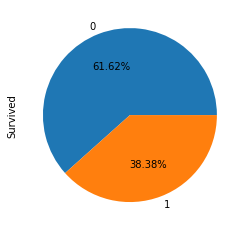

In [ ]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%');

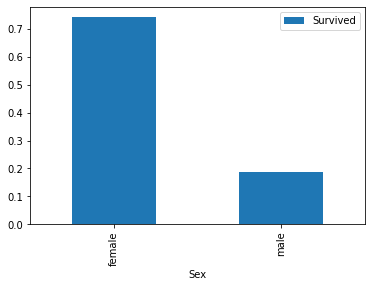

In [ ]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar();

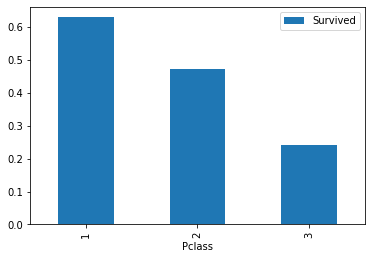

In [ ]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar();

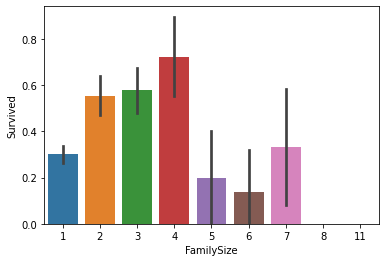

In [ ]:
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp'] + 1 
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp'] + 1 

sns.barplot(data=train_data, x='FamilySize', y='Survived');

In [ ]:
train_data['Singleton'] = train_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train_data['SmallFamily'] = train_data['FamilySize'].map(lambda s: 1 if 2<= s <= 4 else 0)
train_data['LargeFamily'] = train_data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

test_data['Singleton'] = test_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test_data['SmallFamily'] = test_data['FamilySize'].map(lambda s: 1 if 2<= s <= 4 else 0)
test_data['LargeFamily'] = test_data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

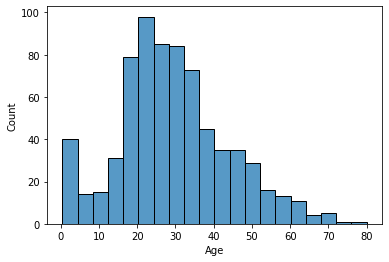

In [ ]:
age_data = train_data[train_data['Age'].notna()][['Age', 'Survived']]
sns.histplot(age_data['Age']);

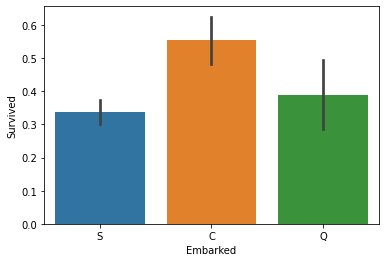

In [ ]:
sns.barplot(data=train_data,x='Embarked',y='Survived');

In [ ]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Don           1
Countess      1
Jonkheer      1
Mme           1
Lady          1
Capt          1
Sir           1
Name: Title, dtype: int64

In [ ]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
train_data['Title']=train_data['Title'].map(Title_Dictionary)
test_data['Title']=test_data['Title'].map(Title_Dictionary)
train_data['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

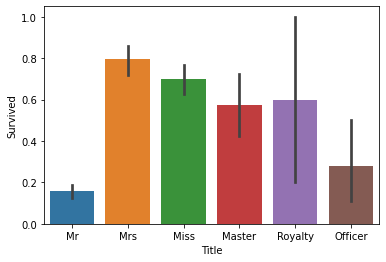

In [ ]:
sns.barplot(data=train_data, x='Title', y='Survived');

In [ ]:
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

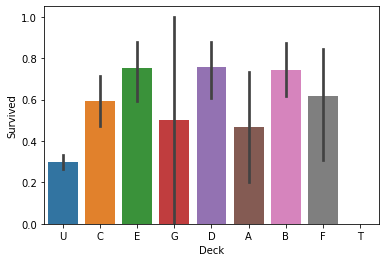

In [ ]:
train_data['Deck']=train_data['Cabin'].map(lambda x:x[0])
test_data['Deck']=test_data['Cabin'].map(lambda x:x[0])
sns.barplot(data=train_data, x='Deck', y='Survived');

**Data pre-processing**

In [ ]:
full_data = pd.concat([train_data, test_data], axis=0)

In [ ]:
full_data[full_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily,Title,Deck
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1,0,0,Miss,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1,0,0,Mrs,B


In [ ]:
full_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
full_data['Embarked'] = full_data['Embarked'].fillna('S')

In [ ]:
full_data[full_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily,Title,Deck
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,1,1,0,0,Mr,U


In [ ]:
full_data['Fare'].mean()

33.2954792813456

In [ ]:
full_data['Fare'] = full_data['Fare'].fillna(33)

In [ ]:
full_data.isnull().sum() 

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilySize       0
Singleton        0
SmallFamily      0
LargeFamily      0
Title            0
Deck             0
dtype: int64

In [ ]:

fullSel=full_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass        -0.338481
Singleton     -0.203367
LargeFamily   -0.125147
Age           -0.077221
SibSp         -0.035322
FamilySize     0.016639
Parch          0.081629
Fare           0.257307
SmallFamily    0.279855
Survived       1.000000
Name: Survived, dtype: float64

In [ ]:
fullSel=fullSel.drop(['SibSp','Parch','FamilySize', "Age"],axis=1)

In [ ]:
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full_data['Pclass'],prefix='Pclass')

PclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
fullSel = pd.concat([fullSel, PclassDf], axis=1)
fullSel.drop('Pclass', axis=1, inplace=True)
fullSel.head()

,Survived,Fare,Singleton,SmallFamily,LargeFamily,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Pclass_1,Pclass_2,Pclass_3
0,0.0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1.0,71.2833,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1.0,7.9250,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,53.1000,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.0,8.0500,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
train = fullSel[fullSel['Survived'].notnull()]
test = fullSel[fullSel['Survived'].isnull()]
targets = train['Survived']
train.drop('Survived', axis=1, inplace=True)
test.drop('Survived', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = train_test_split(train,targets,test_size = 0.2,random_state = 42)

In [ ]:
X_train

,Fare,Singleton,SmallFamily,LargeFamily,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Pclass_1,Pclass_2,Pclass_3
331,28.5000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
733,13.0000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
382,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
704,7.8542,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
813,31.2750,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7.6500,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
270,31.0000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
860,14.1083,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
435,120.0000,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
x = X_train
y = Y_train
L1=20
L2=20
L3=5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(L1,input_shape=(X_train.shape[1],),kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L2,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L3,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epoch = 50
history = model.fit(x,y,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_val, y=Y_val)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

6/6 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7709
Loss = 0.5987301468849182
Test Accuracy = 0.7709497213363647
Training Accuracy = 0.8132022619247437


In [ ]:
l = model.predict(test)
survived = [1 if x > 0.5 else 0 for x in l]
original_test_data = test_data
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived':  survived
})

submission.to_csv('titanic-nn.csv', index=False)

In [ ]:
ad = pd.read_csv('/content/titanic-nn.csv')
ad

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
